# Primer On Creating and Playing Animations in a Jupyter Notebook
---

Table of Contents:
1. [Quick notebook animations via plot updating](#section1)
2. [Creating animations manually using FFmpeg](#section2)
3. [Creating animations using matplotlib.animation](#section3)
4. [Embedding a YouTube video](#section4)

## 1. Quick notebook animations via plot updating <a id='section1'></a>

In [8]:
# set graphics backend
%matplotlib notebook

# import packages
import numpy as np
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


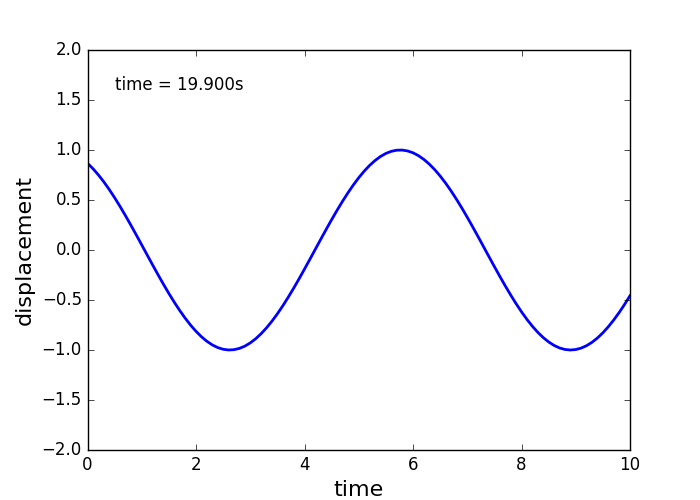

In [10]:
# time grid
tmin = 0
tmax = 20.0
dt = 0.1
tgrid = np.arange(tmin, tmax, dt)

# animation function
def wavefxn(t, x):
    return np.sin(t - x)

# setup figure, axis, and plot element
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('displacement', fontsize=16)
line, = ax.plot([], [], lw=2)
time_template = 'time = %.3fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# update figure
for tstep in tgrid:
    x = np.linspace(0, 10, 101)
    y = wavefxn(tstep, x)
    line.set_data(x, y)
    time_text.set_text(time_template % tstep)
    fig.canvas.draw()

## 2. Creating animations manually using FFmpeg <a id='section2'></a>

In [1]:
# set graphics backend
%matplotlib agg
# import packages
import numpy as np
from matplotlib import pyplot as plt
import os

In [24]:
# time grid
tmin = 0
tmax = 20.0
dt = 0.1
tgrid = np.arange(tmin, tmax, dt)

# animation function
def wavefxn(t, x):
    return np.sin(t - x)

# draw frame function
def draw_frame(t, x):
    ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
    plt.xlabel('time', fontsize=16)
    plt.ylabel('displacement', fontsize=16)
    plt.plot(x, wavefxn(t, x), lw=2, animated=True)
    plt.text(0.05, 0.9, 'time = %5.2fs' % t, transform=ax.transAxes)

#    plt.xlabel('time', fontsize=16)
#    plt.ylabel('displacement', fontsize=16)
#    plt.axis([0, 10.0, -2, 2])
#    plt.text(0.15, 0.95, 'time = %5.3fs' % t, transform=ax.transAxes)
#    plt.plot(x, wavefxn(t, x))

# make frames
for i in range(len(tgrid)):
    x = np.linspace(0, 10, 101)
    file_name = '_temp%05d.png' % i
    draw_frame(tgrid[i], x)
    plt.savefig(file_name)
    plt.clf()

# process frames
os.system("rm wave.mp4")
os.system("ffmpeg -r 25 " +
        " -i _temp%05d.png -vcodec libx264 wave.mp4")
os.system("rm _temp*.png")

0

In [25]:
# playback in notebook
from IPython.display import HTML
HTML("""
<video width="800" height="600" controls>
  <source src="wave.mp4" type="video/mp4">
</video>
""")

## 3. Creating animations using matplotlib.animation <a id='section3'></a>

In [1]:
# set graphics backend
%matplotlib agg 
#so-called "headless" backend, avoids printing figure to notebook
#%matplotlib notebook #figures will be printed to notebook

# import packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
# time grid
tmin = 0 
tmax = 20.0
dt = 0.1
tgrid = np.arange(tmin, tmax, dt)

# setup figure, axis, and plot element
fig = plt.figure();
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('displacement', fontsize=16)
line, = ax.plot([], [], lw=2, animated=True)
time_template = 'time = %5.2fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# initialization function
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# animation function
def wavefxn(t):
    x = np.linspace(0, 10, 101)
    y = np.sin(t - x)
    line.set_data(x, y)
    time_text.set_text(time_template % t)
    return line, time_text

# call animator
anim = animation.FuncAnimation(
    fig, wavefxn, init_func=init, frames=tgrid,
    interval=200, repeat_delay=200, repeat=True, blit=True
)

### Playback as html5 video, option 1

In [3]:
from matplotlib import animation, rc
rc('animation', html='html5')
anim

### Playback as html5 video, option 2

In [21]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Playback from movie file

In [4]:
# save animation
anim.save('wave.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [5]:
# playback in notebook
from IPython.display import HTML
HTML("""
<video width="800" height="600" controls>
  <source src="wave.mp4" type="video/mp4">
</video>
""")

## 4. Embedding a YouTube video <a id='section4'></a>

In [11]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/_GhkWuIDzpc" allowfullscreen></iframe>')